<a href="https://colab.research.google.com/github/creyesmiro/Repositorio-de-prueba/blob/main/Modelo%20de%20Regresion%20-%20Predecir%20la%20producci%C3%B3n%20de%20energ%C3%ADa%20el%C3%A9ctrica%20de%20una%20central%20de%20ciclo%20combinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [21]:
# Abrimos la base de datos que previamente debe ser subida
dataset = pd.read_excel('Folds5x2_pp.xlsx')

#Separar variables dependientes e independientes
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [22]:
# Función seleccionador de modelos para compararlos y procesar datos desde una segunda biblioteca
from sklearn.model_selection import train_test_split

# Recomendable 20 o 25 por ciento, numero de observaciones
# random_state para evitar diferentes divisiones del conjunto de entrenamiento y del conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## Part 2 - Building the ANN

### Initializing the ANN

In [23]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [24]:
# Units: número de neuronas ocultas
# relu: Rectify activation function. Romperá la linealidad de las operaciones que ocurren entre la capa de entrada y la primera capa oculta
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [25]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [26]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [27]:
# Optimizar. Para aplicar stochastic gradient descent, denotado Adam. El optimizador actualizará todos los pesos dentro de esta nueva red con el fin de reducir esta carga.
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

### Training the ANN model on the Training set

In [28]:
# Para entrenar usar método fit.
# Para asegurarse de que se converge al reducir la pérdida se quiere empezar con el 100
# Batch, conjunto de caracteristicas de la matriz para ser optimizadas a la vez.
history=ann.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data=(X_val, y_val))

Epoch 1/100
192/192 [==============================] - 1s 3ms/step - loss: 746273.2500 - accuracy: 0.0000e+00 - val_loss: 407469.8438 - val_accuracy: 0.0000e+00
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 292283.8125 - accuracy: 0.0000e+00 - val_loss: 227058.0938 - val_accuracy: 0.0000e+00
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 210957.1250 - accuracy: 0.0000e+00 - val_loss: 206300.5156 - val_accuracy: 0.0000e+00
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 206224.1250 - accuracy: 0.0000e+00 - val_loss: 206156.7031 - val_accuracy: 0.0000e+00
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 206080.2500 - accuracy: 0.0000e+00 - val_loss: 206011.8594 - val_accuracy: 0.0000e+00
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 205932.6250 - accuracy: 0.0000e+00 - val_loss: 205861.1875 - val_accuracy: 0.0000e+00
Epoch 7/100
192/192 [=============

### Predicting the results of the Test set

In [29]:
# Almacenar valores predichos en una nueva variable
y_pred = ann.predict(X_test)

# Ajustar que la impresión se haga en 2 decimales
np.set_printoptions(precision=2)

#Dar forma vertical a las variables para comparar
print(' y_pred vs. y_test')
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

 y_pred vs. y_test
[[ 18.81 431.23]
 [ 18.81 460.01]
 [ 18.81 461.14]
 ...
 [ 18.81 473.26]
 [ 18.81 438.  ]
 [ 18.81 463.28]]


# Calidad de la estimación
Coeficiente de determinación R-squared
La calidad de la estimación se puede medir a través del Coeficiente de determinación

In [30]:
#Construir el modelo de regresión lineal

#Statsmodel ajusta una linea para el conjunto de datos
import statsmodels.api as sm

#Cte de intercepción
X_train_sm=sm.add_constant(X_train)
print('Intecepto añadido - '+str(X_train_sm))

Intecepto añadido - [[1.00e+00 8.43e+00 4.07e+01 1.02e+03 8.73e+01]
 [1.00e+00 2.70e+01 6.10e+01 1.01e+03 5.90e+01]
 [1.00e+00 2.11e+01 6.31e+01 1.01e+03 9.80e+01]
 ...
 [1.00e+00 2.39e+01 5.99e+01 1.01e+03 8.64e+01]
 [1.00e+00 1.59e+01 4.12e+01 1.01e+03 7.83e+01]
 [1.00e+00 2.64e+01 4.90e+01 1.01e+03 7.08e+01]]


In [31]:
#Ajustar la linea de regresión
lr=sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.975e+04
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        13:05:04   Log-Likelihood:                -17998.
No. Observations:                6123   AIC:                         3.601e+04
Df Residuals:                    6118   BIC:                         3.604e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.0181     12.347     35.556      0.000     414.813     463.223
x1            -1.9636      0.019   -102.166      0.000      -2.001      -1.926
x2            -0.2367      0.009    -25.704      0.000      -0.255      -0.219
x3             0.0774      0.012      6.457      0.000       0.054       0.101
x4            -0.1577      0.005    -30.281      0.000      -0.168      -0.147
==============================================================================
Omnibus:                      547.032   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2304.747
Skew:                          -0.356   Prob(JB):                         0.00
Kurtosis:                       5.920   Cond. No.                     2.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared value es 0.928.

92.8% de la varianza del peso para el conjunto de datos de prueba puede explicarse por la altura.

F es bajo, el ajuste es significativo
Los errores estándar suponen que la matriz de covarianza de los errores está correctamente especificada.

El número de condición es grande, 2,15e+05. Esto podría indicar que hay fuerte multicolinealidad u otros problemas numéricos.

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


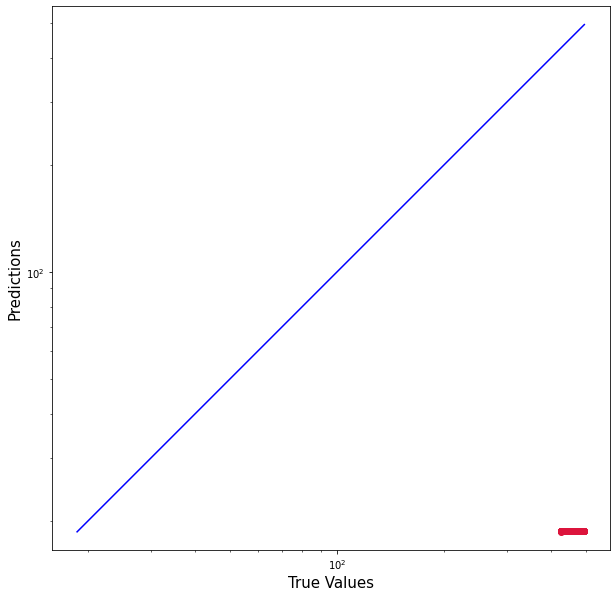

In [32]:
#Graficar comparación de resultados
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Para un conjunto de datos dado, si tenemos una variable dependiente e independiente continua, se puede utilizar un modelo estadístico de regresión lineal simple para predecir la variable dependiente